<a href="https://colab.research.google.com/github/SaulHL08/Notebooks-Datos-Masivos/blob/main/Act5_Ingenier%C3%ADa_de_datos_masivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Obtén el directorio actual
current_directory = os.getcwd()

# Enumera los archivos en el directorio actual
files_in_directory = os.listdir(current_directory)

# Imprime la lista de archivos en el directorio actual
print(files_in_directory)


['.config', 'drive', 'sample_data']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Ruta del archivo CSV
file_path = '/content/drive/MyDrive/adult.csv'

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print(df.head())

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black     NaN   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import category_encoders as ce

# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/adult.csv'
df = pd.read_csv(file_path, na_values=['N/A'])

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Realizar codificación ordinal para la columna 'sex'
encoder = ce.OrdinalEncoder(cols=['sex'], mapping=[{'col': 'sex', 'mapping': {'Female': 0, 'Male': 1}}])
df = encoder.fit_transform(df)

# Realizar codificación one-hot para otras columnas categóricas
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
df = pd.get_dummies(df, columns=categorical_columns)

# Mapear los valores de la columna 'income'
income_mapping = {'<=50K': 'Female', '>50K': 'Male'}
df['income'] = df['income'].map(income_mapping)

# Dividir el conjunto de datos en características y la variable objetivo
X = df.drop(['income'], axis=1)
y = df['income']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo (ajusta los hiperparámetros según sea necesario)
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Mostrar un informe de clasificación con las clases 'Male' y 'Female'
report = classification_report(y_test, y_pred, target_names=['Female', 'Male'])
print(report)

Precisión del modelo: 0.84
              precision    recall  f1-score   support

      Female       0.86      0.94      0.90       637
        Male       0.76      0.56      0.64       215

    accuracy                           0.84       852
   macro avg       0.81      0.75      0.77       852
weighted avg       0.84      0.84      0.84       852



In [ ]:
import pandas as pd
import category_encoders as ce

# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/adult.csv'
df = pd.read_csv(file_path, na_values=['N/A'])

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Realizar codificación ordinal solo para la columna 'sex'
encoder = ce.OrdinalEncoder(cols=['sex'], mapping=[{'col': 'sex', 'mapping': {'Female': 0, 'Male': 1}}])
df['encoded_sex'] = encoder.fit_transform(df)['sex']

# Realizar codificación one-hot para otras columnas categóricas
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
df = pd.get_dummies(df, columns=categorical_columns)

# Mapear los valores de la columna 'income'
income_mapping = {'<=50K': 'Female', '>50K': 'Male'}
df['income'] = df['income'].map(income_mapping)

# Crear una tabla que muestre la preparación de datos
preparation_table = df[['sex', 'encoded_sex', 'income']]

# Mostrar la tabla final
print(preparation_table)


         sex  encoded_sex  income
0       Male            1  Female
1       Male            1  Female
2       Male            1  Female
4     Female            0  Female
5     Female            0  Female
...      ...          ...     ...
4995  Female            0  Female
4996    Male            1    Male
4997    Male            1    Male
4998    Male            1  Female
4999  Female            0  Female

[4257 rows x 3 columns]


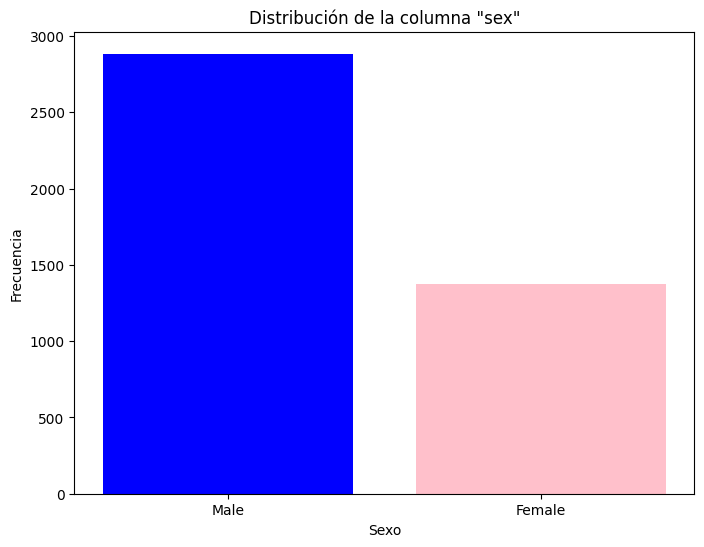

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/adult.csv'
df = pd.read_csv(file_path, na_values=['#NAME?'])

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Crear un gráfico de barras para la columna 'sex'
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'pink'])
plt.title('Distribución de la columna "sex"')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()